In [287]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation as am
import matplotlib.colors as mcolors
from scipy.stats import linregress
import data_processing 

In [288]:
import importlib
importlib.reload(data_processing)

<module 'data_processing' from '/Users/yutingli/Documents/Code/MitoticWaves/data_processing.py'>

In [289]:
filenames = [
    '32-cell H1 inj in PCNA_12052023-01_AcquisitionBlock1_pt1_Detailed.csv', 
    '32-cell H1 inj in PCNA_12052023-01_AcquisitionBlock2_pt2_Detailed.csv', 
    '32c H1 inj_19052023-01_AcquisitionBlock1_pt1_Detailed.csv',
    '32c H1 inj_19052023-01_AcquisitionBlock2_pt2_Detailed.csv',
    '32c H1 inj_25052023-01-1_AcquisitionBlock1_pt1_Detailed.csv',
    '32c H1 inj_25052023-01-1_AcquisitionBlock2_pt2_Detailed.csv' 
]

frame_to_times = [
    39, 39, 39, 39, 39, 39
]
headers = [2, 2, 2, 2, 2, 2, 2]


round_frames = [    
    [0, 37, 81, 130, 190],
    [0,  40,  86, 143, 196],
    [13,  57, 102, 138, 191, 248],
    [0,  48,  78, 132, 188, 243],
    [0,  13,  52,  98, 142, 203],
    [0,  30,  60, 104, 159, 198, 220]
]

n = 0

filename = 'data/'+filenames[n]
f_start = np.array(round_frames[n])

p = data_processing.Processor(filename, headers[n], frame_to_times[n], inject=True)

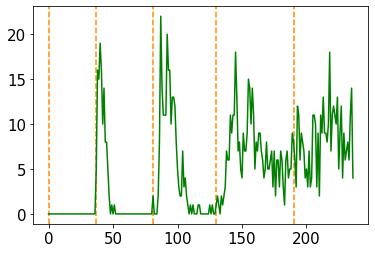

[0, 37, 81, 130, 190]


In [290]:
z_cutoff = 10
p.process(f_start=round_frames[n], z_cutoff=z_cutoff)

divs = np.array([d['count']-np.sum(d['z']<z_cutoff) for d in p.divisions])

for f in p.f_start: 
    plt.axvline(x=f, color='darkorange', linestyle='--')
plt.plot(divs, 'g-')
plt.show() 

print(repr(p.f_start))

## Find the surface cells of the last round of division

In [282]:
spherical_polar = p.get_spherical_polar(-4) 
p.label_surface_cells(spherical_polar)

# for index in range(1, len(p.rounds)):
#     s = p.rounds[index]['sur']
#     polar = np.array(spherical_polar[index])[s]
#     d, phi, theta, D = polar.T
#     fig, ax = plt.subplots(subplot_kw={'projection': 'polar'}, figsize=(6, 6))
#     im = ax.scatter(phi, theta, c=d/D)
#     ax.set_ylim([0, np.pi/2])
#     ax.set_yticklabels([])
#     plt.colorbar(im)
#     plt.show() 

## Look at xyz projections 

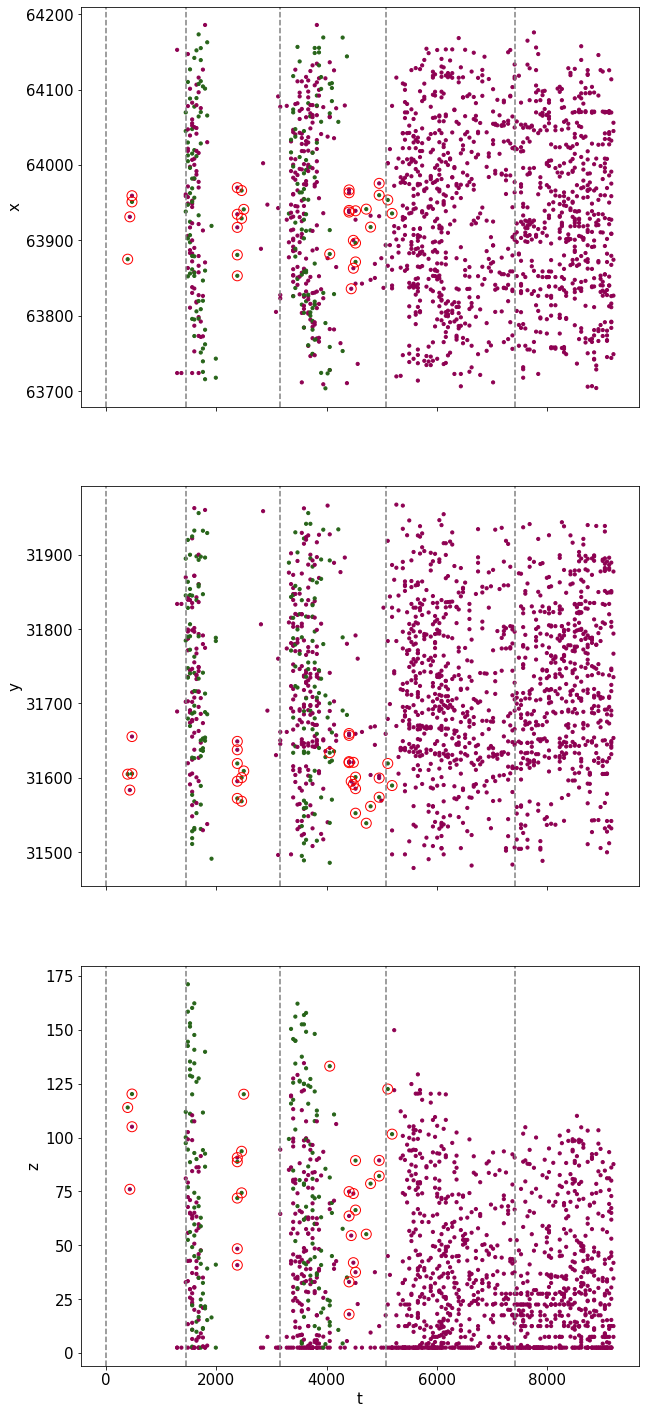

In [291]:
p.plot_xyz(filename, save=False) # green: surface cells 

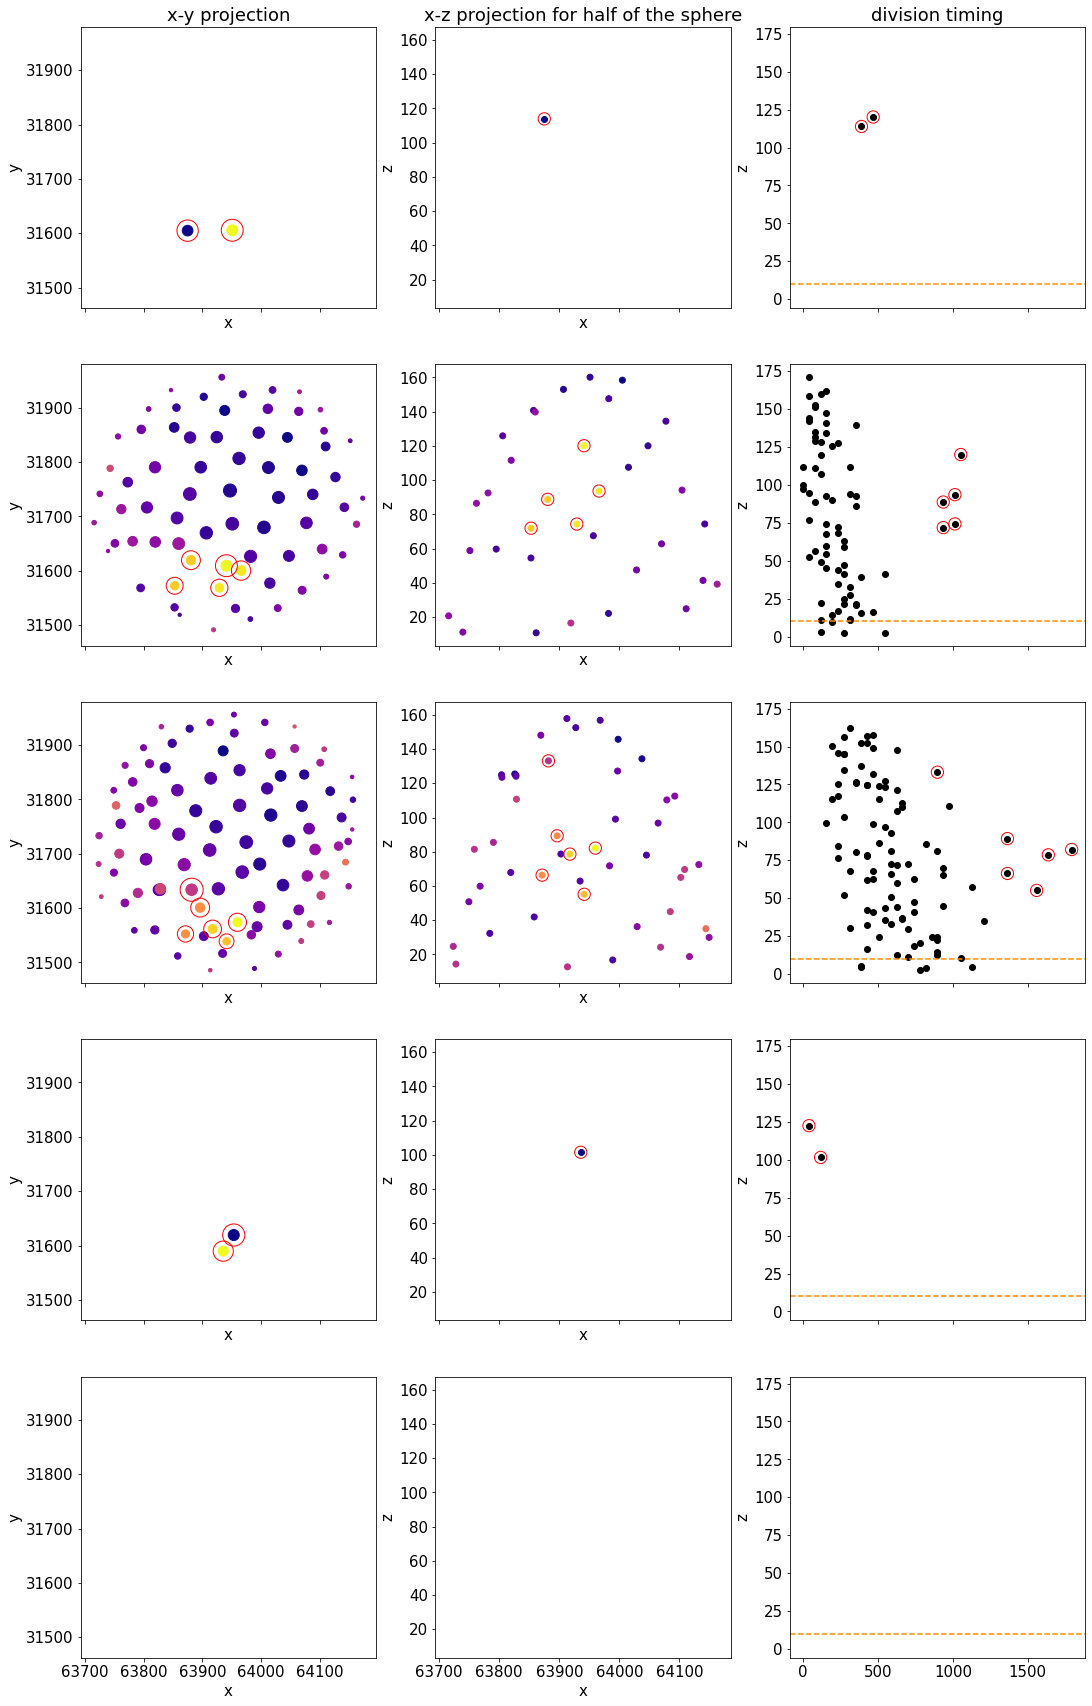

In [292]:
p.plot_rounds(filename, surface=True, z_cutoff=10, save=False)

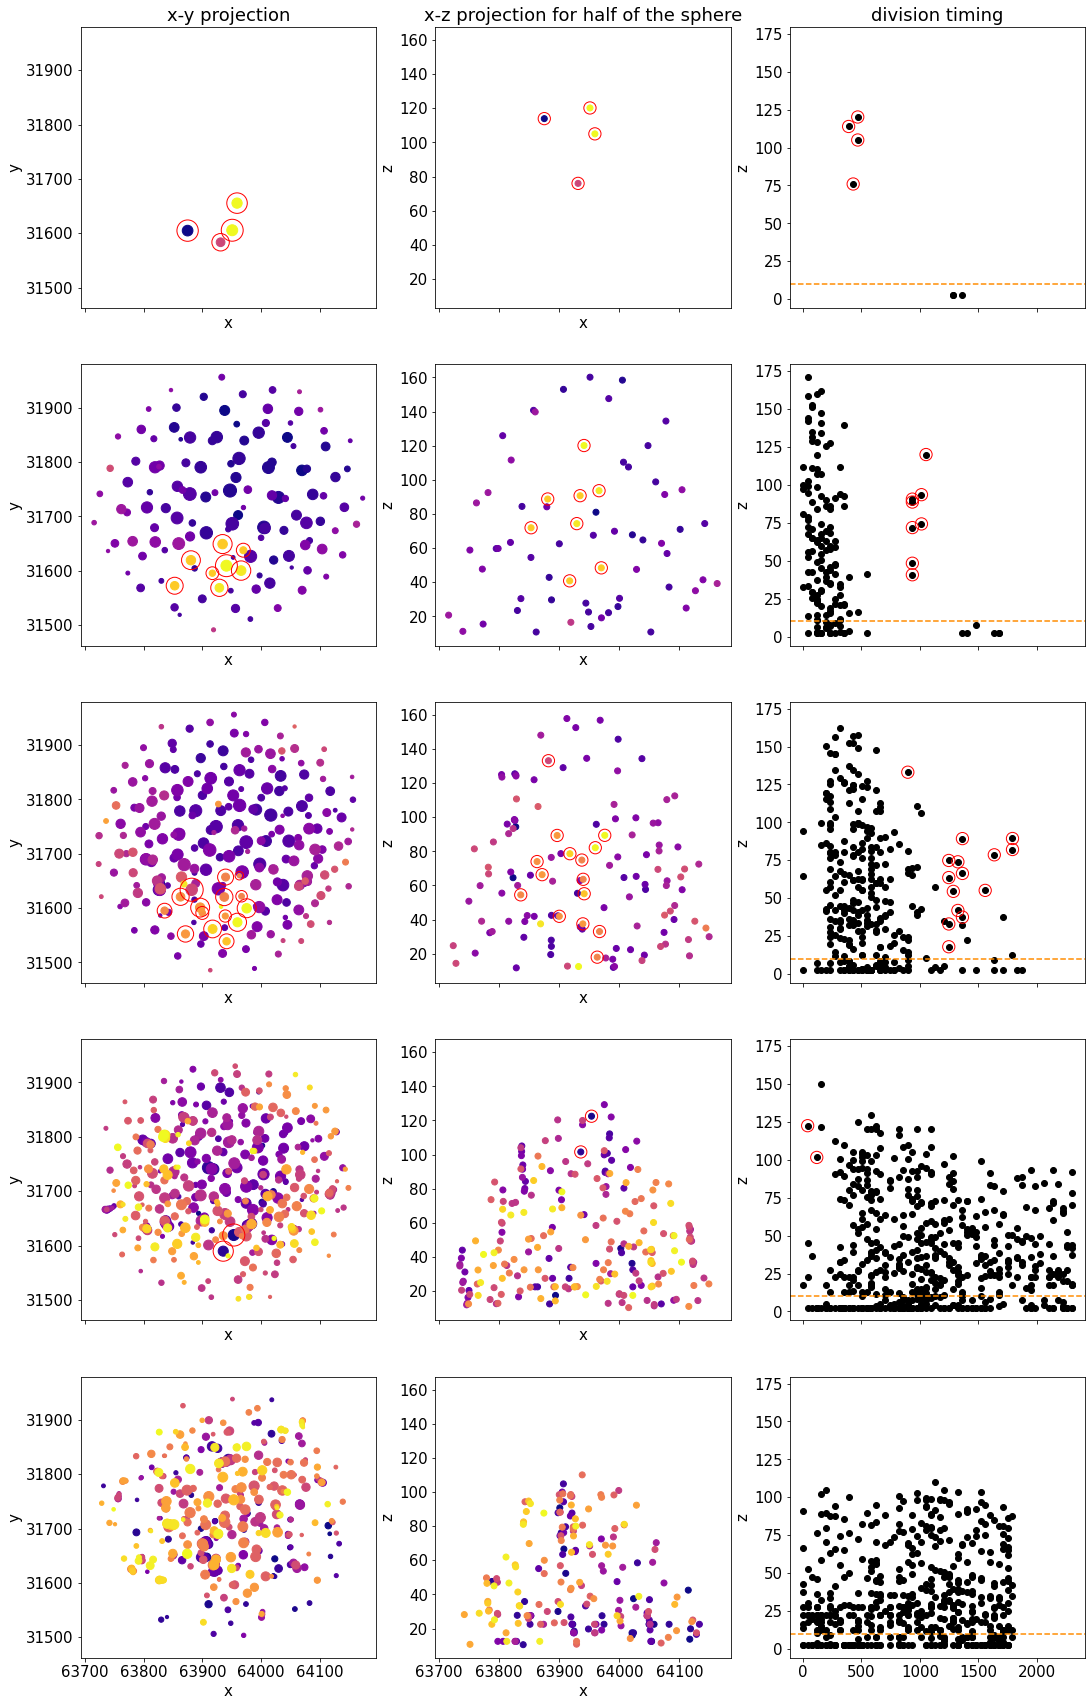

In [286]:
p.plot_rounds(filename, surface=False, z_cutoff=10, save=False)